# Problem 2

In this Jupyter notebook, we visualize how HMMs work. This visualization corresponds to problem 2 in set 6.

Assuming your HMM module is complete and saved at the correct location, you can simply run all cells in the notebook without modification.

In [1]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

## Visualization of the dataset

We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:

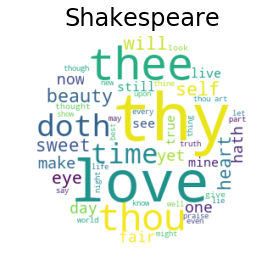

In [2]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [3]:
obs, obs_map = parse_observations(text)

In [15]:
obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 10, 100)

0
10
20
30
40
50
60
70
80
90


## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

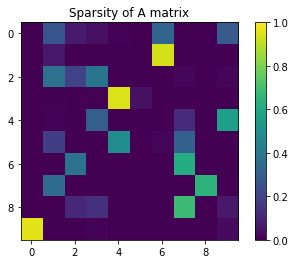

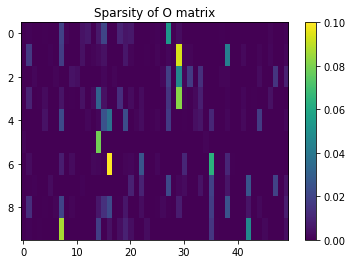

In [10]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence

As you have already seen, an HMM can be used to generate sample sequences based on the given dataset. Run the cell below to show a sample sentence based on the Constitution.

In [11]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=25))

Sample Sentence:
Thy to blindness a a still for for journey issueless this that watery number ills is work servant still earth new redeem best clouds vouchsafe...


## Part H: Using varying numbers of hidden states

Using different numbers of hidden states can lead to different behaviours in the HMMs. Below, we train several HMMs with 1, 2, 4, and 16 hidden states, respectively. What do you notice about their emissions? How do these emissions compare to the emission above?

In [7]:
import re
def gen_basic_sonnet(sentence):
    sentence = re.sub("[^\w]", " ",  sentence.lower()).split()
    
    filepath = 'data/Syllable_dictionary.txt'
    dict = {}
    with open(filepath) as fp:
        for cnt, line in enumerate(fp):
            lst = line.split()
            if len(lst) > 2:
                dict[lst[0]] = [lst[1], lst[2]]
            else:
                dict[lst[0]] = lst[-1]
    
    sonnet = ""
    for l in range(14):
        line = ""
        syllables = 10
        while syllables > 0 and len(sentence) > 0:
            word = sentence.pop(0)
            if word not in dict.keys():
                continue
            if len(dict[word]) > 1:
                word_sylls = [int(s.replace('E', '')) for s in dict[word]]
                word_sylls.sort()
                if syllables - min(word_sylls) <= 0:
                    syllables -= min(word_sylls)
                elif syllables - max(word_sylls) > 0:
                    syllables -= max(word_sylls)
                else:
                    syllables -= min(word_sylls)
                line += (word + " ")
            else:
                syllables -= int(dict[word])
                line += (word + " ")
        sonnet += line + "\n"
    
    return sonnet

In [5]:
hmm1 = unsupervised_HMM(obs, 1, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm1, obs_map, n_words=25))

0
10
20
30
40
50
60
70
80
90

Sample Sentence:
Sway simplicity be nothing a and right would miscalled these with ill with unhappily alone i art leave tongue-tied i gone gone to restful limping...


In [8]:
sent1 = sample_sentence(hmm1, obs_map, n_words=140)
print(gen_basic_sonnet(sent1))

with forsworn and disgraced beggar simple 
gone tired truth tongue tied love forsworn and 
these beggar i born shamefully and and 
honour faith good purest disgraced disgraced 
all rudely skill sway as forsworn beggar 
made captive good wrongfully simplicity 
these perfection made shamefully virtue 
die in strength all art with art jollity 
alone simplicity with folly by 
leave nothing maiden by to and as right 
gone all made skill captain captive and nothing 
these nothing good virtue strength right authority 
tired captain love and be maiden miscalled 
trimmed captain sway like and and would made needy 



In [9]:
hmm2 = unsupervised_HMM(obs, 2, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm2, obs_map, n_words=25))

0
10
20
30
40
50
60
70
80
90

Sample Sentence:
Desert that truth art desert good my simplicity gilded purest cry rudely captain miscalled forsworn art leave art all disgraced by behold trimmed jollity by...


In [10]:
sent2 = sample_sentence(hmm2, obs_map, n_words=140)
print(gen_basic_sonnet(sent2))

right faith nothing shamefully purest cry 
honour perfection simplicity and 
honour and all ill strength these i and captain 
desert controlling to tired and jollity 
and with would as sway be all like faith captive 
with folly alone forsworn and with simple 
to born and for to maiden skill to disabled 
my forsworn disgraced leave desert strength by 
nothing these as and art for skill as and 
die with as disgraced ill nothing skill nothing 
sway authority to shamefully all 
to tired attending right gilded simple 
trimmed as shamefully honour with behold 
by from and made and maiden and all these 



In [11]:
hmm4 = unsupervised_HMM(obs, 4, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm4, obs_map, n_words=25))

0
10
20
30
40
50
60
70
80
90

Sample Sentence:
Tongue-tied ill for in disabled these simplicity and trimmed (doctor-like) with in strumpeted nothing leave gone folly rudely simplicity my a in strength these tired...


In [12]:
sent4 = sample_sentence(hmm4, obs_map, n_words=140)
print(gen_basic_sonnet(sent4))

miscalled like leave would virtue from these as 
and trimmed like miscalled from and and and tired 
i strumpeted by purest and folly 
shamefully be forsworn jollity by 
honour shamefully with strumpeted and 
art i strength faith and by save desert all 
ill simple like disgraced and tired controlling 
misplaced to from and honour death disabled 
gone purest and disgraced these would wrongfully 
born faith skill and simple beggar save these 
simple in unhappily to purest 
tired with simplicity desert disabled 
and disgraced and folly i unhappily 
and and these captive i authority 



In [13]:
hmm16 = unsupervised_HMM(obs, 16, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm16, obs_map, n_words=25))

0
10
20
30
40
50
60
70
80
90

Sample Sentence:
And trimmed that born and needy that perfection purest sway cry right perfection folly my and alone by gilded honour love simplicity and purest (doctor-like)...


In [14]:
sent16 = sample_sentence(hmm16, obs_map, n_words=140)
print(gen_basic_sonnet(sent16))

simple that i captive my and die miscalled 
and save authority born and simple 
in that perfection purest faith unhappily 
alone and captive my disabled 
alone and death honour love restful limping 
sway shamefully with tongue tied these tired misplaced 
and these tired skill all these from maiden 
these tired with and save captain to as 
perfection behold desert a strength by 
death sway shamefully skill all would maiden 
would tired with strumpeted restful purest 
i cry strength to forsworn and folly honour 
disabled forsworn perfection behold 
desert tired with all from these tired misplaced 



In [16]:
hmm16 = unsupervised_HMM(obs, 20, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm16, obs_map, n_words=25))

0
10
20
30
40
50
60
70
80
90

Sample Sentence:
A beggar captain and needy these from sway jollity and tired truth i these for right be my these needy these and right made i...


In [17]:
sent16 = sample_sentence(hmm16, obs_map, n_words=140)
print(gen_basic_sonnet(sent16))

tongue tied with shamefully misplaced and gilded 
with limping i truth shamefully misplaced 
and folly to attending strumpeted 
and trimmed these trimmed attending strumpeted 
ill tired with i these from these from these 
from nothing for trimmed these needy these and 
restful be unhappily forsworn and 
tongue tied truth i desert maiden to behold 
love that good die tongue tied honour miscalled 
misplaced and as a rudely jollity 
ill simple faith shamefully forsworn and 
tongue tied leave gone these needy nothing from 
these needy these needy nothing trimmed nothing 
and simple faith i love as to behold 



## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

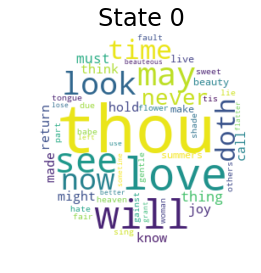

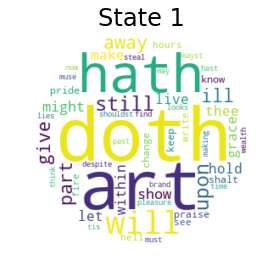

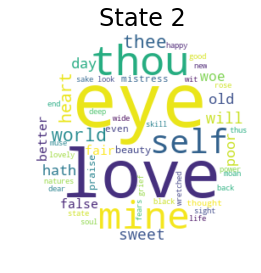

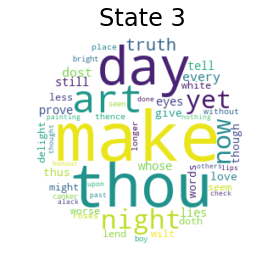

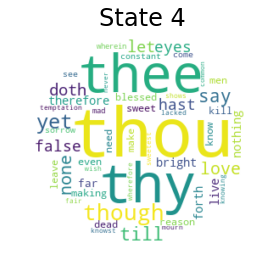

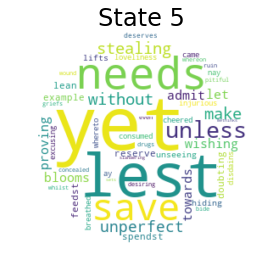

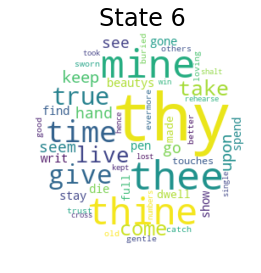

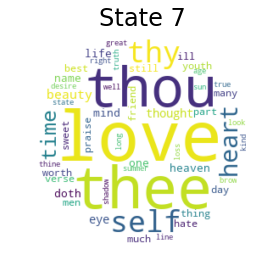

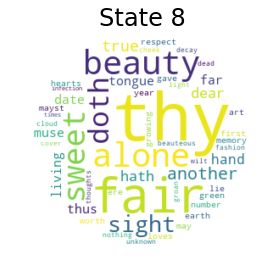

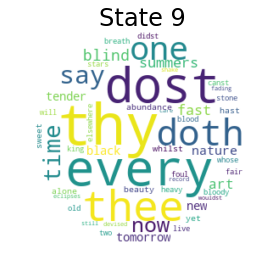

In [17]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

## Visualizing the process of an HMM generating an emission

The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "



Animating...


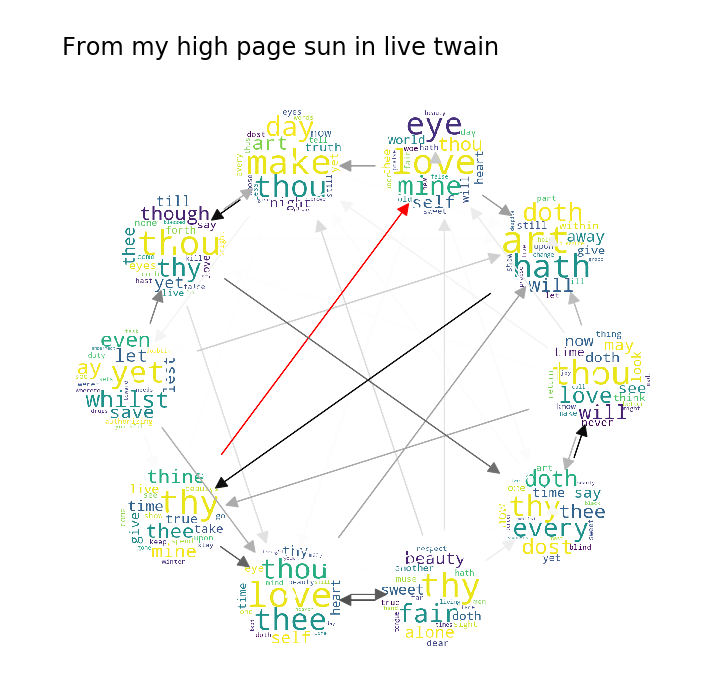

In [30]:
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())